## <center>Курсовой проект<a class="anchor" id="course_project"></a><center>

### Примерное описание этапов выполнения курсового проекта<a class="anchor" id="course_project_steps"></a>

**Построение модели классификации**
1. Обзор обучающего датасета
2. Обработка выбросов
3. Обработка пропусков
4. Анализ данных
5. Отбор признаков
6. Балансировка классов
7. Подбор моделей, получение бейзлана
8. Выбор наилучшей модели, настройка гиперпараметров
9. Проверка качества, борьба с переобучением
10. Интерпретация результатов

**Прогнозирование на тестовом датасете**
1. Выполнить для тестового датасета те же этапы обработки и постронияния признаков
2. Спрогнозировать целевую переменную, используя модель, построенную на обучающем датасете
3. Прогнозы должны быть для всех примеров из тестового датасета (для всех строк)
4. Соблюдать исходный порядок примеров из тестового датасета

### Обзор данных<a class="anchor" id="course_project_review"></a>

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые льготы
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

**Пути к директориям и файлам**

In [62]:
import numpy as np
import pandas as pd

In [63]:
TRAIN_DATASET_PATH = 'course_project/course_project_train.csv'
TEST_DATASET_PATH = 'course_project/course_project_test.csv'

**Загрузка данных**

In [64]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [65]:
df_train.shape

(7500, 17)

In [66]:
df_train.iloc[0]

Home Ownership                            Own Home
Annual Income                               482087
Years in current job                           NaN
Tax Liens                                        0
Number of Open Accounts                         11
Years of Credit History                       26.3
Maximum Open Credit                         685960
Number of Credit Problems                        1
Months since last delinquent                   NaN
Bankruptcies                                     1
Purpose                         debt consolidation
Term                                    Short Term
Current Loan Amount                          1e+08
Current Credit Balance                       47386
Monthly Debt                                  7914
Credit Score                                   749
Credit Default                                   0
Name: 0, dtype: object

Обзор данных

Обзор целевой переменной

In [67]:
df_train['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

Обзор тестового набора

In [68]:
df_test = pd.read_csv(TEST_DATASET_PATH)
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [69]:
df_test.shape

(2500, 16)

In [70]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


Обзор номинативных признаков

In [71]:
for cat_colname in df_train.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df_train[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

Обработка выбросов

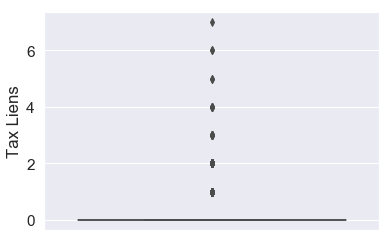

In [72]:
import seaborn as sns
sns.boxplot(y="Tax Liens", data=df_train)

In [73]:
df_train.loc[df_train['Tax Liens'] > 1, 'Tax Liens']

39      3.0
254     2.0
592     2.0
1078    2.0
1129    4.0
1202    2.0
1214    6.0
1393    3.0
1525    2.0
1860    2.0
1928    2.0
1943    2.0
2365    2.0
2549    2.0
2716    5.0
2956    2.0
3028    4.0
3389    2.0
3435    5.0
3445    2.0
3814    4.0
3823    2.0
4122    4.0
4271    2.0
4366    2.0
4416    3.0
4509    2.0
4582    2.0
4774    4.0
4990    3.0
5039    2.0
5073    2.0
5250    3.0
5373    6.0
5396    2.0
5415    2.0
5484    2.0
5585    3.0
5728    2.0
5904    3.0
5969    7.0
6031    2.0
6055    2.0
6232    3.0
6555    3.0
6557    2.0
6619    2.0
6907    4.0
7356    2.0
7459    3.0
7461    2.0
Name: Tax Liens, dtype: float64

Обработка пропусков

In [74]:
len(df_train) - df_train.count()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

Заполняем пропуски

In [75]:
df_train.loc[pd.isnull(df_train['Annual Income']), 'Annual Income'] = df_train['Annual Income'].mean()

In [76]:
df_train.loc[pd.isnull(df_train['Years in current job']), 'Years in current job'] = '10+ years'

In [77]:
df_train.loc[pd.isnull(df_train['Months since last delinquent']), 'Months since last delinquent'] = df_train['Months since last delinquent'].mean()

In [78]:
df_train.loc[pd.isnull(df_train['Credit Score']), 'Credit Score'] = df_train['Credit Score'].mean()

In [79]:
df_train['Code_Term'] = df_train['Term'].map({'Short Term':'0', 'Long Term':'1'}).astype(int)

Dummies

In [80]:
for cat_colname in df_train.select_dtypes(include='object').columns:
    df_train = pd.concat([df_train, pd.get_dummies(df_train[cat_colname], prefix=cat_colname)], axis=1)

In [81]:
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
0,Own Home,482087.0,10+ years,0.0,11.0,26.3,685960.0,1.0,34.6926,1.0,...,0,0,0,0,0,0,0,0,0,1
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,34.6926,0.0,...,0,0,0,0,0,0,0,0,1,0
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,34.6926,0.0,...,0,0,0,0,0,0,0,0,0,1
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,34.6926,1.0,...,0,0,0,0,0,0,0,0,0,1
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,34.6926,0.0,...,0,0,0,0,0,0,0,0,0,1


In [82]:
from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import zconfint
from matplotlib import pyplot as plt
%matplotlib inline

In [83]:
df = pd.read_csv(TRAIN_DATASET_PATH)
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df.columns.drop(TARGET_NAME).tolist()
NEW_FEATURE_NAMES = df_train.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES +['Term_Short Term','Term_Long Term']).tolist()

Корреляция с базовыми признаками

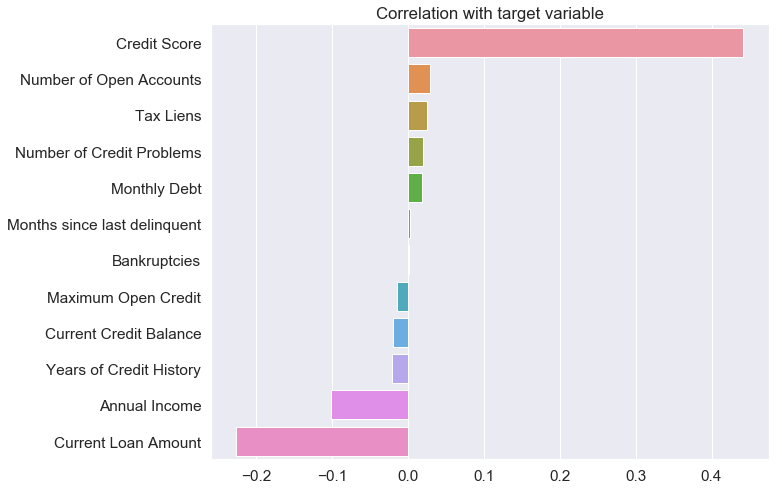

In [84]:
corr_with_target = df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

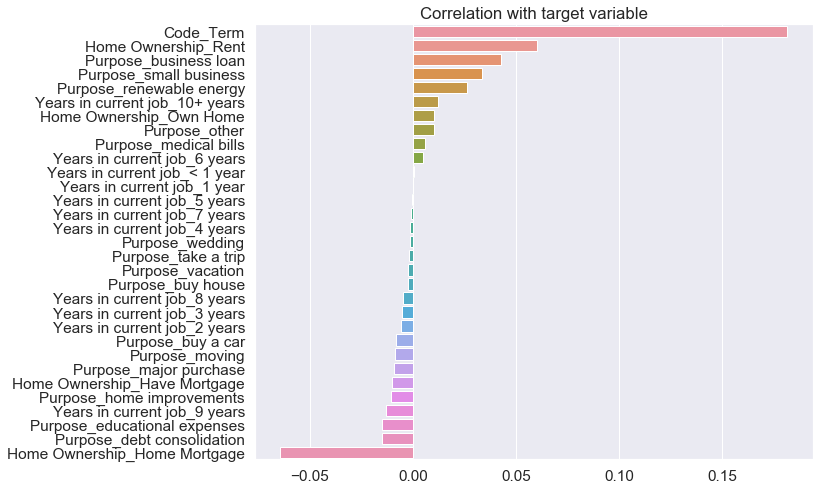

In [85]:
corr_with_target = df_train[NEW_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

Матрица корреляций

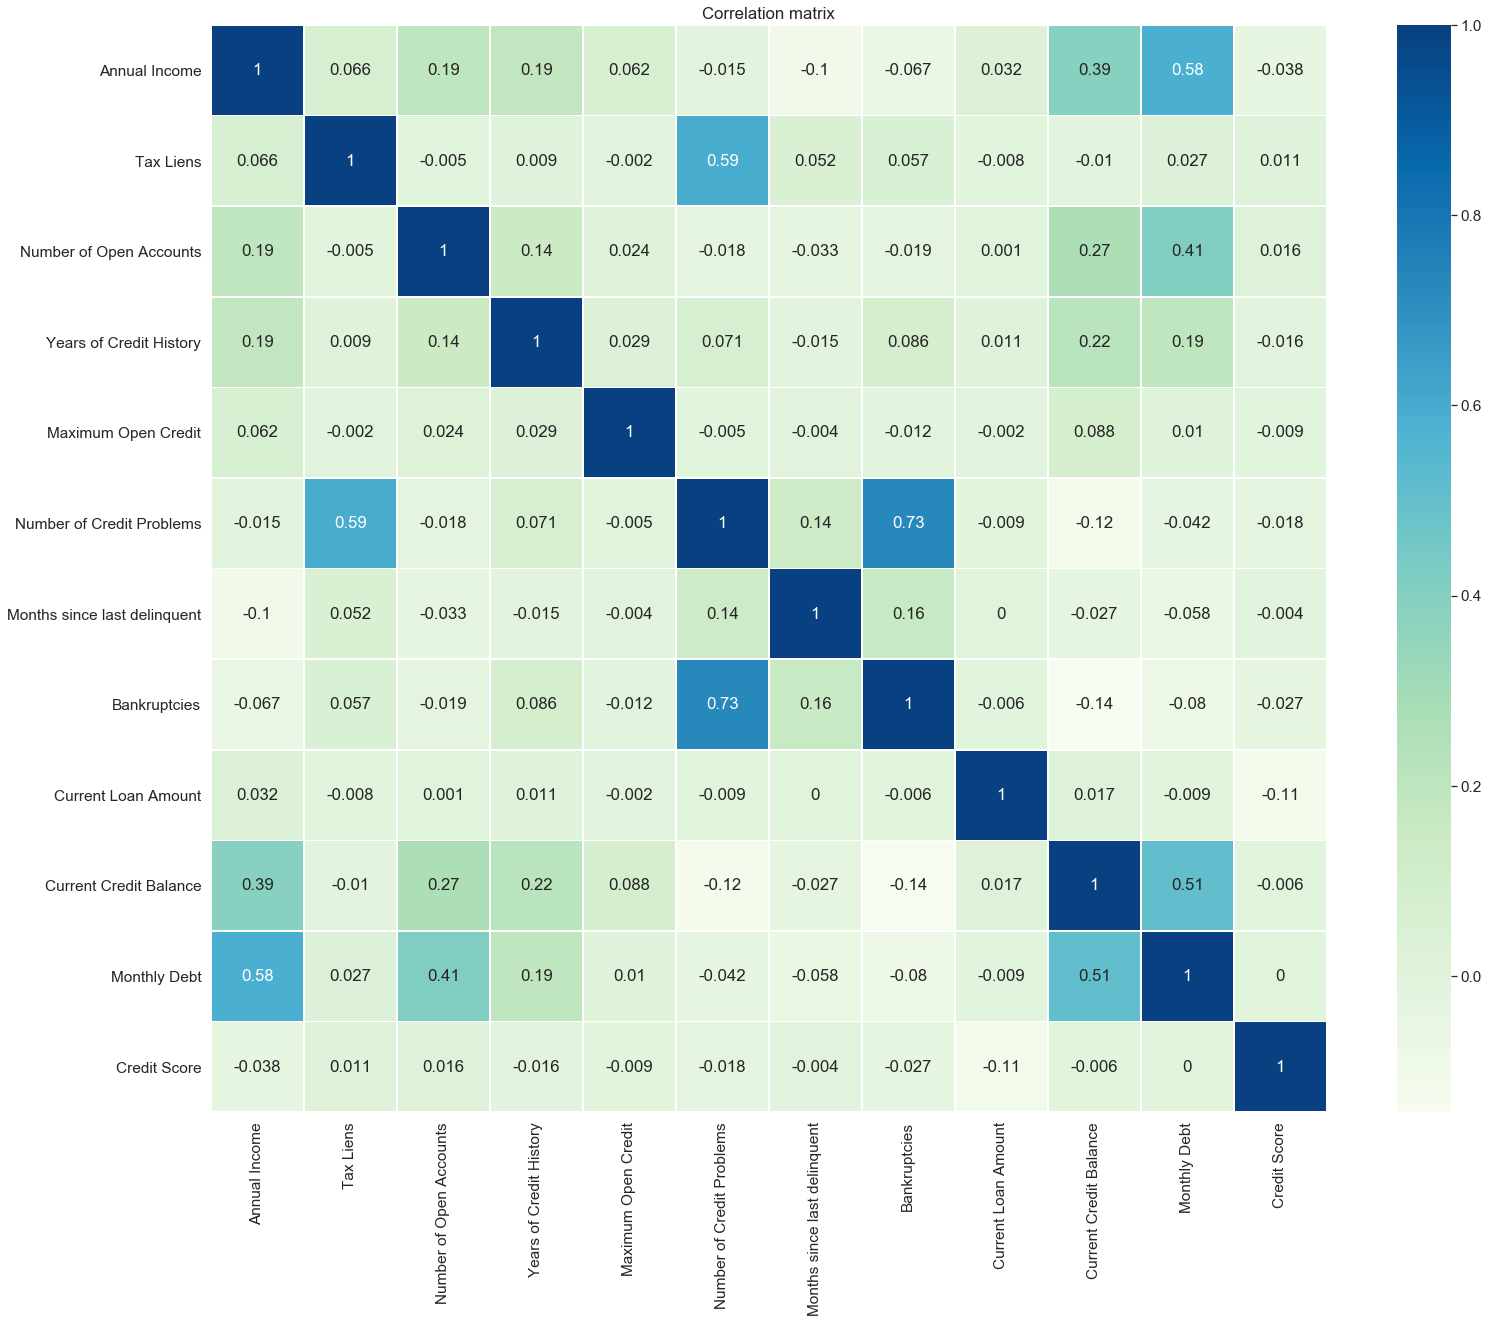

In [86]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df[BASE_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

Корреляции: Tax Liens <--> Number of Credit Problems; Annual Income <--> Monthy Debt; 
Current Credit Balance <--> Monthy Debt; Bunkruptcies <--> Number of Credit Problems   

Отбор параметров

Credit Score, Number of Open Accounts, Tax Liens, Number of Credit Problems, Current Loan Ammount, Annual Income, Years of Credit History, Current Credit Balance

In [87]:
import pandas as pd
import numpy as np
import pickle
import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#import xgboost as xgb, lightgbm as lgbm, catboost as catb

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [88]:
import warnings
warnings.simplefilter('ignore')

In [89]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [90]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

In [91]:
df = pd.read_csv(TRAIN_DATASET_PATH)
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df.columns.drop(TARGET_NAME).tolist()
NEW_FEATURE_NAMES = df_train.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES +['Term_Short Term','Term_Long Term']).tolist()

Отбор признаков

In [92]:
NUMERIC_FEATURE_NAMES = ['Credit Score', 'Number of Open Accounts', 'Tax Liens', 'Number of Credit Problems', 'Current Loan Amount', 'Annual Income', 'Years of Credit History', 'Current Credit Balance','Monthly Debt','Maximum Open Credit']

FEATURE_NAMES_SELECTED = NUMERIC_FEATURE_NAMES + NEW_FEATURE_NAMES

Нормализация данных

In [93]:
scaler = StandardScaler()

df_norm = df_train.copy()
df_norm[NUMERIC_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUMERIC_FEATURE_NAMES])

df = df_norm.copy()

### Разбиение на train и test<a class="anchor" id="train_and_test"></a>

In [94]:
X = df[FEATURE_NAMES_SELECTED]
y = df[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=211)

In [95]:
TARGET_NAME in FEATURE_NAMES_SELECTED

False

In [96]:
len(X_test.columns)

41

### Балансировка целевой переменной<a class="anchor" id="target_balancing"></a>

In [97]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced[TARGET_NAME].value_counts()

0    4047
1    3156
Name: Credit Default, dtype: int64

In [98]:
X_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

### Построение и оценка базовых моделей<a class="anchor" id="baseline_modeling"></a> 

**Логистическая регрессия**

In [99]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.68      0.83      0.75      4047
           1       0.70      0.50      0.58      3156

   micro avg       0.69      0.69      0.69      7203
   macro avg       0.69      0.67      0.67      7203
weighted avg       0.69      0.69      0.68      7203

TEST

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1340
           1       0.58      0.53      0.55       535

   micro avg       0.76      0.76      0.76      1875
   macro avg       0.70      0.69      0.69      1875
weighted avg       0.75      0.76      0.75      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1135  205
1                251  284


Исходя из сравнения данных TRAIN и TEST переобучения не произошло. 

### Подготовка тестовых данных<a class="anchor" id="target_balancing"></a>

Обработка пропусков

In [100]:
df_test = pd.read_csv(TEST_DATASET_PATH)

In [101]:
#dt_train = df_test

df_test.loc[pd.isnull(df_test['Annual Income']), 'Annual Income'] = df_test['Annual Income'].mean()

df_test.loc[pd.isnull(df_test['Years in current job']), 'Years in current job'] = '10+ years'

df_test.loc[pd.isnull(df_test['Months since last delinquent']), 'Months since last delinquent'] = df_test['Months since last delinquent'].mean()

df_test.loc[pd.isnull(df_test['Credit Score']), 'Credit Score'] = df_test['Credit Score'].mean()

df_test['Code_Term'] = df_test['Term'].map({'Short Term':'0', 'Long Term':'1'}).astype(int)

for cat_colname in df_test.select_dtypes(include='object').columns:
    df_test = pd.concat([df_test, pd.get_dummies(df_test[cat_colname], prefix=cat_colname)], axis=1)

In [102]:
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
0,Rent,1.366922e+06,4 years,0.0,9.0,12.5,220968.0,0.0,70.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
1,Rent,2.318380e+05,1 year,0.0,6.0,32.7,55946.0,0.0,8.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
2,Home Mortgage,1.152540e+06,3 years,0.0,10.0,13.7,204600.0,0.0,34.181261,0.0,...,0,0,0,0,0,0,0,0,0,1
3,Home Mortgage,1.220313e+06,10+ years,0.0,16.0,17.0,456302.0,0.0,70.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
4,Home Mortgage,2.340952e+06,6 years,0.0,11.0,23.6,1207272.0,0.0,34.181261,0.0,...,0,0,0,0,0,0,0,0,1,0


In [103]:
FEATURE_NAMES_SELECTED_OLD = FEATURE_NAMES_SELECTED

In [104]:
df = pd.read_csv(TEST_DATASET_PATH)
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df.columns.tolist()
NEW_FEATURE_NAMES = df_test.columns.drop(BASE_FEATURE_NAMES + ['Term_Short Term','Term_Long Term']).tolist()

In [105]:
NUMERIC_FEATURE_NAMES = ['Credit Score', 'Number of Open Accounts', 'Tax Liens', 'Number of Credit Problems', 'Current Loan Amount', 'Annual Income', 'Years of Credit History', 'Current Credit Balance','Monthly Debt','Maximum Open Credit']

FEATURE_NAMES_SELECTED = NUMERIC_FEATURE_NAMES + NEW_FEATURE_NAMES

In [106]:
scaler = StandardScaler()

df_norm = df_test.copy()
df_norm[NUMERIC_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUMERIC_FEATURE_NAMES])

df = df_norm.copy()

In [107]:
len(df)

2500

In [108]:
len(FEATURE_NAMES_SELECTED_OLD)

41

При команде Dummy идет преобразование категориальных переменных, при этом все категории разбиваются на отдельные столбцы. В результате этого преобразования кол-во столбцов может не совпась. 

Чтобы решить эту проблему надо в FEATURE_NAMES_SELECTED дополнительно занети столбцы, которые там отсутствуют, но присутствуют в FEATURE_NAMES_SELECTED_OLD. И наоборот надо удалить лишние столбцы. В результате количество столбцов в обеих наборах FEATURE_NAMES_SELECTED и FEATURE_NAMES_SELECTED_OLD должно совпасть!   

In [109]:
X_test = df[FEATURE_NAMES_SELECTED]
len(X_test)

2500

In [110]:
for i in FEATURE_NAMES_SELECTED_OLD:
    if i not in FEATURE_NAMES_SELECTED:
        print(i)
        X_test[i] = 0        

Purpose_renewable energy


In [111]:
for i in FEATURE_NAMES_SELECTED:
    if i not in FEATURE_NAMES_SELECTED_OLD:
        print(i)
        X_test.columns.drop(i)   

In [112]:
len(X_test.columns)

41

In [113]:
len(X_test)

2500

In [114]:
y_test_pred = model_lr.predict(X_test)

In [115]:
len(y_test_pred)

2500

In [116]:
df_test[TARGET_NAME] = y_test_pred

In [117]:
len(df_test)

2500

In [119]:
df_test.loc[:,[TARGET_NAME]].to_csv('VZinchenko_predictions.csv',index=None)

В качестве финальной модели использовал логистическую регрессию. Еще попробовал случайный лес (RandomForest), но результат получился хуже. Бустнговые модели посмотреть не успел.